Expt05 - four image classes using TensorFlow Lite 
- A T Chamberlain 
- written 2022/12/29  

Will use the 'flowers' code from Matt Butlers example as a template to develope code to run a CNN for four image classes of feed types. 

Can explore some diagnostics - which images are wrongly classified etc. 
Would be possible to generate code to deploy to a suitably set up microprocessor.

In [1]:
# import tensorFlow Lite 
!pip install -q tflite-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 16.6 MB/s eta 0:00

Set up libraries etc

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Look to sort out repeatability by setting the seeds to a given number 

In [3]:
from numpy.random import seed
seed(1)

Now want to get data access sorted - this is on my Google Drive but in a sub-sub-directory. Mount my Google Drive 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now define the folder on My Drive - right from the root. 
This is the only line needed to be changed to switch between the two 2-class datasets. 

In [5]:
image_path = '/content/drive/MyDrive/Assessment_7082_Silage/Expt05'

In [6]:
print (image_path)
cwd = os.getcwd()
print (cwd)

/content/drive/MyDrive/Assessment_7082_Silage/Expt05
/content


In [7]:
!ls

drive  sample_data


Load the data and split 80:20. This does not shuffle them so risk that not well stratified by farm.  There are 265 MS,  216 GS, 253 Straw, 231 TMR images so a 20% split will give respectable test set data sizes. 

In [8]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.8)

Create tensor flow model

With 20 epochs accuracy was 99.2% and still improving – and loss was still falling. On evaluation with the test data was 98.96% accurate. 

Repeat with 50 epochs to see if we can get to over-fitting. Not sure how we re-initialise the model so will restart all of colab. Get 99.5% accuracy on test data set.  

Very soon (4 epochs) gets most of the images learnt but then get very gradual gains – but risk of over learning at greater Epochs so rerun at 10 epochs. Now get 99.1% accuracy on the training data set and 99% on the test set. The gains from additional epochs are very small and the risk of performing poorly on an independent validation set increase. 



In [9]:
model = image_classifier.create(train_data, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
24/24 [==============================] - 107s 4s/step - loss: 0.8316 - accuracy: 0.7617
Epoch 2/10
24/24 [==============================] - 8s 323ms/step - loss: 0.5395 - accuracy: 0.9414
Epoch 3/10
24/24 [==================

Evaluate the model 

In [10]:
loss, accuracy = model.evaluate(test_data)

7/7 [==============================] - 24s 3s/step - loss: 0.4356 - accuracy: 0.9896


Now visualise the results on the test data set  with mis-classified images labelled in red.  

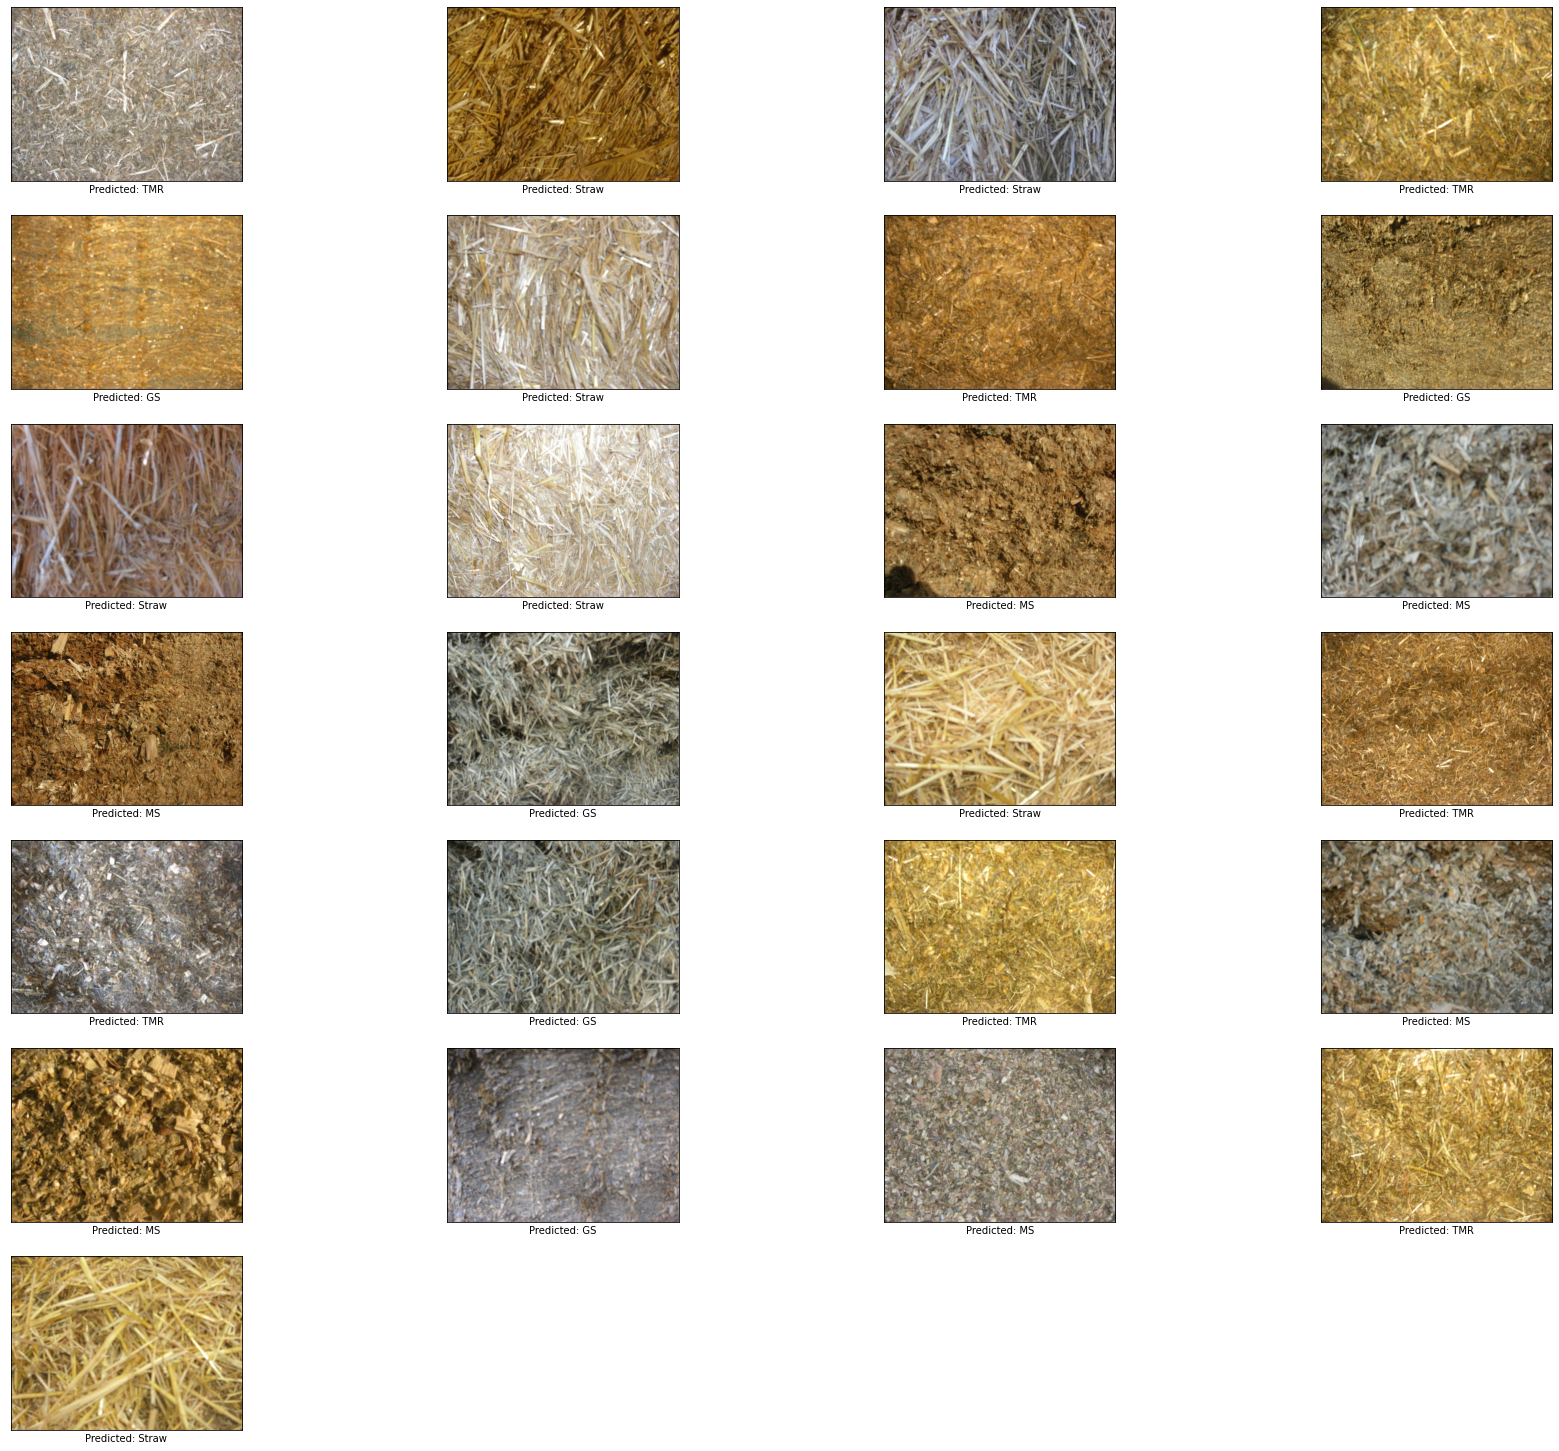

In [11]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(30, 30))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(25)):
  ax = plt.subplot(8, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

Results show model performs well on the four classes and with 771 cases in the training set. Without assessment on an independent Validation dataset looks like TL Lite performs as well as a full TF model and this will be easier to deploy or a IoT type device based in a Raspberry Pi or similar. 